In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!unzip '/content/drive/My Drive/ML PROJECT/A_Z Handwritten Data.zip'

Archive:  /content/drive/My Drive/ML PROJECT/A_Z Handwritten Data.zip
  inflating: A_Z Handwritten Data.csv  


# .CSV TO IMAGE 

#CNN

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dense, Dropout, Flatten


In [0]:
classifier = Sequential()

In [0]:
classifier.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


In [0]:
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [0]:
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 26, activation = 'sigmoid'))

In [0]:
classifier.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

#Appending images of dataset to numpy array 

In [0]:
#Saving Images from the dataset folder
import os
fixed_size = tuple((28, 28))
train_path='/content/drive/My Drive/ML PROJECT/A-Z dataset'
test_size = 0.20
seed = 9
train_labels = os.listdir(train_path)
train_labels.sort()
import numpy as np
from keras.preprocessing import image
global_features = []
labels = []

i, j = 0, 0
k = 0
train_image=[]
for training_name in train_labels:
    # join the training data path and each species training folder
    dir = os.path.join(train_path, training_name)

    # get the current training label
    current_label = training_name

    k = 1
    # loop over the images in each sub-folder
    for x in os.listdir(dir):
        file = dir + "/"  + str(x) 
        img = image.load_img(file, target_size=(28,28,1), grayscale=True)
        img = image.img_to_array(img)
        img = img/255
        train_image.append(img)
        labels.append(current_label)
        i += 1
        k += 1
    print ("Processed Folder : {}".format(current_label))
    j += 1
global_features=np.array(train_image)


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


#Appling encoder on alphabet

In [0]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import h5py
from sklearn.preprocessing import MinMaxScaler


targetNames = np.unique(labels)
le = LabelEncoder()
target = le.fit_transform(labels)
target=target.reshape(-1,1)
print(target.shape)
onehotencoder = OneHotEncoder(categorical_features = [0])
ylabel = onehotencoder.fit_transform(target).toarray()
target=ylabel
global_labels=target


(372451, 1)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


#Splitting Data Into Training Set and Test Set

In [0]:

from sklearn.model_selection import train_test_split, cross_val_score
(train_Data, test_Data, train_Label, test_Label) = train_test_split(np.array(global_features),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)





In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/ML PROJECT/A-Z dataset',
        target_size=(28, 28),
        batch_size=32,
    color_mode='grayscale',
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/ML PROJECT/A-Z testset',
        target_size=(28, 28),
        batch_size=32,
    color_mode='grayscale',
        class_mode='categorical')

Found 372451 images belonging to 26 classes.
Found 2574 images belonging to 26 classes.


In [0]:
history=classifier.fit(train_Data, train_Label, epochs=2)

W0705 22:54:47.048126 140457977395072 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0705 22:54:47.108133 140457977395072 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/2
297960/297960 [==============================] - 47s 158us/step - loss: 0.1667 - acc: 0.9510
Epoch 2/2
297960/297960 [==============================] - 40s 135us/step - loss: 0.0620 - acc: 0.9828


In [0]:

history=classifier.fit_generator(
        train_generator,
        steps_per_epoch=1000,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=80)



Epoch 1/5
1000/1000 [==============================] - 163s 163ms/step - loss: 0.9782 - acc: 0.6964 - val_loss: 0.7591 - val_acc: 0.7984
Epoch 2/5
1000/1000 [==============================] - 150s 150ms/step - loss: 0.3578 - acc: 0.8960 - val_loss: 0.5570 - val_acc: 0.8529
Epoch 3/5
1000/1000 [==============================] - 150s 150ms/step - loss: 0.2792 - acc: 0.9183 - val_loss: 0.5491 - val_acc: 0.8647
Epoch 4/5
1000/1000 [==============================] - 151s 151ms/step - loss: 0.2319 - acc: 0.9344 - val_loss: 0.5057 - val_acc: 0.8639
Epoch 5/5
1000/1000 [==============================] - 150s 150ms/step - loss: 0.2099 - acc: 0.9376 - val_loss: 0.4260 - val_acc: 0.8938


In [0]:
import csv
from PIL import Image
import numpy as np
import string
from PIL import Image
import PIL.ImageOps 
import os
from skimage import io
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [0]:
import shutil

def Extract(fontName,istest):
  linecntr=lettercntr=0
  ext=".png"
  if(istest==1):
    ext=os.path.splitext(os.path.basename(fontName))[1]
    fontName=os.path.splitext(os.path.basename(fontName))[0]
  os.chdir('/content/drive/My Drive/ML PROJECT')
  if(istest==0):
    if os.path.exists("dataset/"+fontName):
      shutil.rmtree("dataset/"+fontName)
    os.makedirs("dataset/"+fontName)   
    
  if(istest==1):
    if os.path.exists("testset_chars"):
      shutil.rmtree("testset_chars")
    os.makedirs("testset_chars")       
  #img_times = io.imread('TimesNewRoman.PNG', as_gray=True)
  if(istest==0):
    img_times = io.imread(fontName+ext, as_gray=True)
  else:
    img_times = io.imread("testinput/"+fontName+ext, as_gray=True)
    
  start_i=[]
  prev_i=1
  
  for i in range(img_times.shape[0]):
    u = np.unique(img_times[i]) 
    if(len(u)>1):
      if(prev_i==1):
        start_i.append([i,i+1])
        prev_i=0
      start_i[-1][1]=i
    else:
      if(len(u)==1):
        prev_i=1

  cntr=0

  sentenses=[]
  for i in start_i:    
    cropped = img_times[i[0]:i[1],:img_times.shape[1]]
    io.imsave("temp/"+fontName+"_"+str(i[0])+".png",cropped)
    sentenses.append(cropped)
    plt.imshow(cropped)
    plt.show()

  
  start_j=[]
  prev_i=1
  cntr=-1


  for lines in sentenses:
    #plt.imshow(lines)
    #plt.show()
    linecntr+=1
    whitecntr=0
    cntr+=1
    out_arr = np.asarray(lines)
    for j in range(lines.shape[1]):
      slices=out_arr[:,j]
      u = np.unique(slices)
      #print(u)
      if(len(u)>1):
        if(prev_i==1):
          start_j.append([cntr,j,j+1])       
          prev_i=0

        if(start_j[-1][2]<j):        
          start_j[-1][2]=j
      else:
        if(len(u)==1):
          prev_i=1
  i=0;
  
  i=0
  prevline=0
  
  for chrtr in start_j:
    if(prevline!=chrtr[0]):
      i=0
      prevline=chrtr[0]
    cropped=sentenses[chrtr[0]][:,chrtr[1]-2:chrtr[2]+2]
    #plt.imshow(cropped)
    #plt.show()  
    lettercntr+=1
    if(istest==0):
      io.imsave("dataset/"+fontName+"/"+str(chrtr[0])+"_"+str(i)+".png",cropped)
    else:
      io.imsave("testset_chars/"+fontName+"_"+str(chrtr[0])+"_"+str(i)+".png",cropped)
    #sentenses.append(cropped)
    i+=1
  return (linecntr,lettercntr)
   

Enter File Name:testa.png


W0706 01:12:40.337450 140457977395072 util.py:61] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


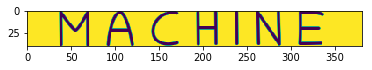

W0706 01:12:40.465906 140457977395072 util.py:61] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


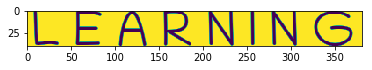

W0706 01:12:40.595592 140457977395072 util.py:61] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0706 01:12:40.600831 140457977395072 util.py:61] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0706 01:12:40.605928 140457977395072 util.py:61] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0706 01:12:40.614377 140457977395072 util.py:61] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0706 01:12:40.619516 140457977395072 util.py:61] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
W0706 01:12:40.628101 140457977395072 util.py:61] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress 

Lines : 2    Letters : 15


In [0]:
str_file=input("Enter File Name:")
(line,letters)=Extract(str_file,1)
print("Lines :",line,"   Letters :",letters)


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


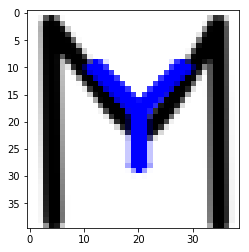

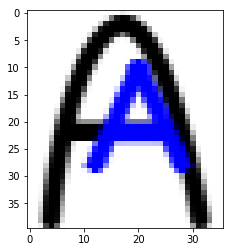

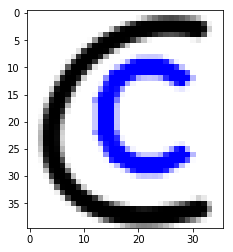

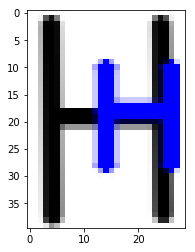

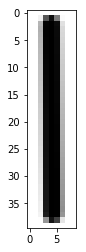

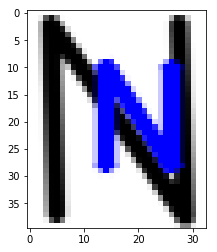

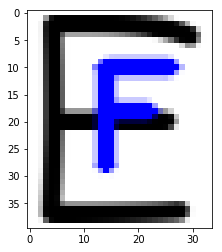

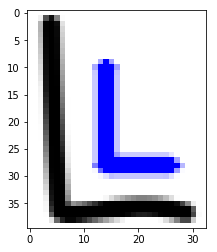

 Y A C H B N F


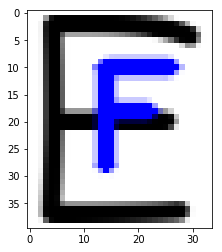

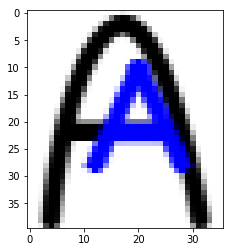

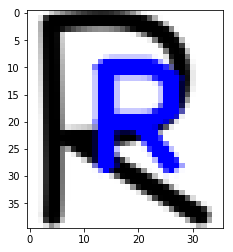

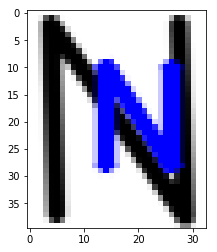

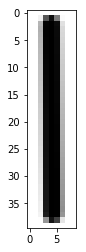

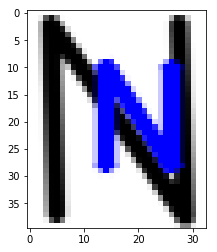

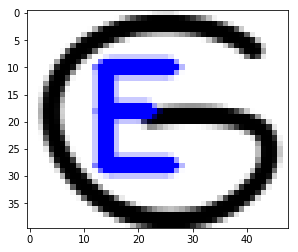

 L F A R N B N E


In [0]:

from keras.preprocessing import image

import matplotlib.pyplot as plt
import glob
import cv2
# path to test data
#test_path = "/content/testset/A/"
test_path = "/content/drive/My Drive/ML PROJECT/testset_chars/"

# loop through the test images

txtout=""
lcnt="0"
for file in os.listdir(test_path):
    # read the image
    file=test_path+file
    img1 = image.load_img(file)
    fileparts=file.split('_')
    
    
    img = image.load_img(file, target_size=(28,28,1), grayscale=True)
    test_image = image.img_to_array(img)

    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis = 0)
    pred = classifier.predict(test_image)
    predicted_class_indices=np.argmax(pred,axis=1)
    labels = (train_generator.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    predictions = [labels[k] for k in predicted_class_indices]

    img1=cv2.putText(np.array(img1), predictions[0], (10,30), cv2.FONT_HERSHEY_PLAIN,  2,(0,0,255),2,cv2.LINE_AA)
    plt.imshow(img1)
    plt.show()
    if(len(fileparts)>=2):
      if(lcnt!=fileparts[-2]):
        print(txtout)
        txtout=""
        lcnt=fileparts[-2]
    txtout=txtout+" "+predictions[0]
    
print(txtout)